In [1]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [2]:
import os
path = Path('./understanding_cloud_organization')
os.listdir(path)

['test_images',
 '.DS_Store',
 'train.csv',
 'train_images',
 'sample_submission.csv']

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
np.random.seed(91)

In [4]:
train = pd.read_csv(path/'train.csv')

In [5]:
train.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [6]:
n_train = len(os.listdir(f'{path}/train_images'))
n_test = len(os.listdir(f'{path}/test_images'))
print(f'There are {n_train} images in train dataset')
print(f'There are {n_test} images in test dataset')

There are 5546 images in train dataset
There are 3698 images in test dataset


In [7]:
train['Image_Label'].apply(lambda x: x.split('_')[1]).value_counts()

Flower    5546
Gravel    5546
Fish      5546
Sugar     5546
Name: Image_Label, dtype: int64

In [8]:
train.loc[train['EncodedPixels'].isnull() == False, 'Image_Label'].apply(lambda x: x.split('_')[0]).value_counts().value_counts()

2    2372
3    1560
1    1348
4     266
Name: Image_Label, dtype: int64

Only 266 images have all four masks. It is important to remember this.

In [9]:
sub = pd.read_csv(path/'sample_submission.csv')

In [10]:
sub.head()

,Image_Label,EncodedPixels
0,002f507.jpg_Fish,1 1
1,002f507.jpg_Flower,1 1
2,002f507.jpg_Gravel,1 1
3,002f507.jpg_Sugar,1 1
4,0035ae9.jpg_Fish,1 1


In [11]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [12]:
fnames = get_image_files(path/'train_images')
fnames[:3]

[PosixPath('understanding_cloud_organization/train_images/8734e73.jpg'),
 PosixPath('understanding_cloud_organization/train_images/0ece863.jpg'),
 PosixPath('understanding_cloud_organization/train_images/c54d2ef.jpg')]

In [13]:
index = 0
for i in fnames:
    if i.as_posix().split('/')[-1] == '8242ba0.jpg':
        print(index)
    index+=1

1929


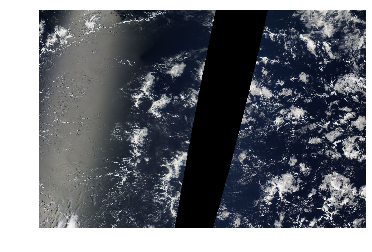

In [14]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(8,4))

In [15]:
img_f

PosixPath('understanding_cloud_organization/train_images/8734e73.jpg')

In [16]:
train.loc[train['Image_Label'].str.contains("8734e73.jpg_*",regex=True)]

,Image_Label,EncodedPixels
11856,8734e73.jpg_Fish,NaN
11857,8734e73.jpg_Flower,642862 632 644262 632 645662 632 647062 632 64...
11858,8734e73.jpg_Gravel,NaN
11859,8734e73.jpg_Sugar,NaN


In [17]:
train['EncodedPixels'].loc[train['Image_Label'].str.contains("8734e73.jpg_*",regex=True)].values[0] == train['EncodedPixels'].loc[train['Image_Label'].str.contains("8734e73.jpg_*",regex=True)].values[0]

False

In [18]:
len(train['EncodedPixels'].loc[train['Image_Label'].str.contains("8734e73.jpg_*",regex=True)].values[1].split())

4946

In [19]:
len(np.zeros((1400, 2100)).flatten())

2940000

In [20]:
# get_y_fn = lambda x: train.loc[train['Image_Label'].str.contains("8734e73.jpg_*",regex=True)]['EncodedPixels'][1:2]
get_y_fn_fish = lambda x: train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[0] if train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[0] == train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[0] else ''
get_y_fn_flower = lambda x: train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[1] if train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[1] == train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[1] else ''
get_y_fn_gravel = lambda x: train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[2] if train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[2] == train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[2] else ''
get_y_fn_sugar = lambda x: train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[3] if train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[3] == train['EncodedPixels'].loc[train['Image_Label'].str.contains(x.as_posix().split('/')[-1]+"*",regex=True)].values[3] else ''

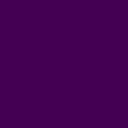

In [21]:
# mask = open_mask(get_y_fn(img_f.as_posix().split('/')[-1]))
# mask.show(figsize=(5,5), alpha=1)

mask_fish = open_mask_rle(get_y_fn_fish(img_f), shape=(1400, 2100)).resize((1,128,128))
mask_fish

In [22]:
type(mask_fish)

fastai.vision.image.ImageSegment

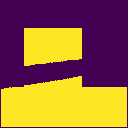

In [23]:
mask_flower = open_mask_rle(get_y_fn_flower(img_f), shape=(1400, 2100)).resize((1,128,128))
mask_flower

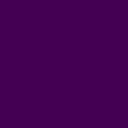

In [24]:
mask_gravel = open_mask_rle(get_y_fn_gravel(img_f), shape=(1400, 2100)).resize((1,128,128))
mask_gravel

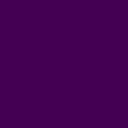

In [25]:
mask_sugar = open_mask_rle(get_y_fn_sugar(img_f), shape=(1400, 2100)).resize((1,128,128))
mask_sugar

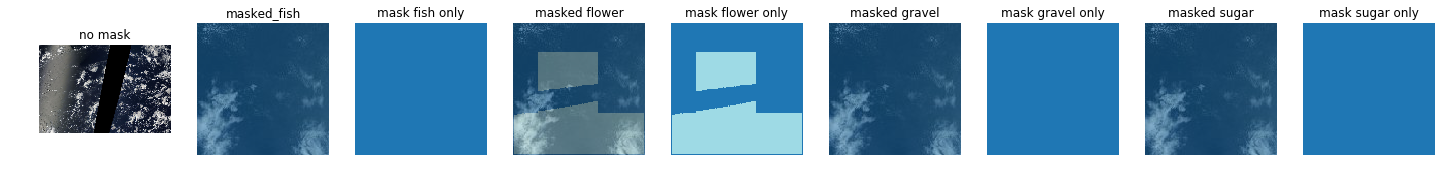

In [26]:
_,axs = plt.subplots(1,9, figsize=(25,16))
img.show(ax=axs[0], title='no mask')
img.show(ax=axs[1], y=mask_fish, title='masked_fish')
mask_fish.show(ax=axs[2], title='mask fish only', alpha=1.)
img.show(ax=axs[3], y=mask_flower, title='masked flower')
mask_flower.show(ax=axs[4], title='mask flower only', alpha=1.)
img.show(ax=axs[5], y=mask_gravel, title='masked gravel')
mask_gravel.show(ax=axs[6], title='mask gravel only', alpha=1.)
img.show(ax=axs[7], y=mask_sugar, title='masked sugar')
mask_sugar.show(ax=axs[8], title='mask sugar only', alpha=1.)


In [27]:
src_size = np.array(mask_flower.shape[1:])
src_size,mask_flower.data

(array([128, 128]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 1, 1,  ..., 1, 1, 0],
          [0, 1, 1,  ..., 1, 1, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [28]:
fish_images = train.loc[train['Image_Label'].str.contains(".*_Fish",regex=True)]

In [29]:
fish_images.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
12,0035239.jpg_Fish,NaN
16,003994e.jpg_Fish,2367966 18 2367985 2 2367993 8 2368002 62 2369...


In [30]:
size = src_size
bs = 4

In [31]:
size

array([128, 128])

In [32]:
path_img = path/'train_images';path_img.ls()

[PosixPath('understanding_cloud_organization/train_images/8734e73.jpg'),
 PosixPath('understanding_cloud_organization/train_images/0ece863.jpg'),
 PosixPath('understanding_cloud_organization/train_images/c54d2ef.jpg'),
 PosixPath('understanding_cloud_organization/train_images/3124a1e.jpg'),
 PosixPath('understanding_cloud_organization/train_images/a438b48.jpg'),
 PosixPath('understanding_cloud_organization/train_images/94aff90.jpg'),
 PosixPath('understanding_cloud_organization/train_images/eb8ac47.jpg'),
 PosixPath('understanding_cloud_organization/train_images/e298926.jpg'),
 PosixPath('understanding_cloud_organization/train_images/4c60d33.jpg'),
 PosixPath('understanding_cloud_organization/train_images/d84a0d8.jpg'),
 PosixPath('understanding_cloud_organization/train_images/6158df3.jpg'),
 PosixPath('understanding_cloud_organization/train_images/d5a17de.jpg'),
 PosixPath('understanding_cloud_organization/train_images/60bac00.jpg'),
 PosixPath('understanding_cloud_organization/train_

In [67]:
for image in path_img.iterdir():
    mask_fish = open_mask_rle(get_y_fn_fish(image), shape=(2100, 1400))
    mask_fish.save(path_img/'..'/'fish_masks'/f'{image.stem}_fish_mask.png')

In [68]:
for image in path_img.iterdir():
    mask_fish = open_mask_rle(get_y_fn_flower(image), shape=(2100, 1400))
    mask_fish.save(path_img/'..'/'flower_masks'/f'{image.stem}_flower_mask.png')

In [69]:
for image in path_img.iterdir():
    mask_fish = open_mask_rle(get_y_fn_gravel(image), shape=(2100, 1400))
    mask_fish.save(path_img/'..'/'gravel_masks'/f'{image.stem}_gravel_mask.png')

In [70]:
for image in path_img.iterdir():
    mask_fish = open_mask_rle(get_y_fn_sugar(image), shape=(2100, 1400))
    mask_fish.save(path_img/'..'/'sugar_masks'/f'{image.stem}_sugar_mask.png')

In [71]:
get_y_fn_f = lambda x: path_img/'..'/'fish_masks'/f'{x.stem}_fish_mask.png'

In [72]:
get_y_fn_fl = lambda x: path_img/'..'/'flower_masks'/f'{x.stem}_flower_mask.png'

In [73]:
get_y_fn_g = lambda x: path_img/'..'/'gravel_masks'/f'{x.stem}_gravel_mask.png'

In [74]:
get_y_fn_s = lambda x: path_img/'..'/'sugar_masks'/f'{x.stem}_sugar_mask.png'

In [75]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.2)
       .label_from_func(get_y_fn_f,classes=[0,1]))

In [76]:
src

LabelLists;

Train: LabelList (4437 items)
x: SegmentationItemList
Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: understanding_cloud_organization/train_images;

Valid: LabelList (1109 items)
x: SegmentationItemList
Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100),Image (3, 1400, 2100)
y: SegmentationLabelList
ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100),ImageSegment (1, 1400, 2100)
Path: understanding_cloud_organization/train_images;

Test: None

In [77]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

In [78]:
data.show_batch(2, figsize=(10,7))

RuntimeError: DataLoader worker (pid(s) 43868) exited unexpectedly

In [80]:
metrics=dice

In [81]:
learn = unet_learner(data, models.resnet34, metrics=[metrics])

In [82]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: DataLoader worker (pid(s) 43879) exited unexpectedly

In [83]:
type(img_f)

pathlib.PosixPath